데이터 살펴보기

In [ ]:
import pandas as pd

df = pd.read_csv('/content/seoul_temp (1).csv')
df['년'] = df['년'].str[3:]
df

결측치 처리하기(null값 처리)

In [ ]:
df.isnull()

,년,지점,평균기온,최저기온,최고기온
0,False,False,True,True,True
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
112,False,False,False,False,False
113,False,False,False,False,False
114,False,False,False,False,False
115,False,False,False,False,False


In [ ]:
df.isnull().sum()

년       0
지점      0
평균기온    0
최저기온    0
최고기온    0
dtype: int64

결측값 처리하기(subset)

In [ ]:
df.dropna(subset=['지점'], inplace=True)
df.isnull().sum()

년       0
지점      0
평균기온    0
최저기온    0
최고기온    0
dtype: int64

빈값을 해당 컬럼의 평균값 채우기

In [ ]:
df.fillna(df.mean(), inplace=True)
df

,년,지점,평균기온,최저기온,최고기온
0,1907,108.0,11.736937,7.443243,16.734234
1,1908,108.0,10.400000,5.800000,15.700000
2,1909,108.0,10.600000,5.800000,16.000000
3,1910,108.0,10.300000,5.700000,15.900000
4,1911,108.0,10.600000,6.000000,15.900000
...,...,...,...,...,...
111,2018,108.0,12.900000,8.800000,17.900000
112,2019,108.0,13.500000,9.300000,18.500000
113,2020,108.0,13.200000,9.400000,17.900000
114,2021,108.0,13.700000,9.600000,18.500000


1988년 이후 데이터 조회,
내가 태어난 나이 데이터 조회

In [ ]:
df[df['연도'] > 1988]

0      False
1      False
2      False
3      False
4      False
       ...  
111     True
112     True
113     True
114     True
115     True
Name: 년, Length: 116, dtype: bool

In [ ]:
df[df['연도'] > 2010]

1988년 이후 데이터조회(int)

In [ ]:
df['연도'] = df['연도'].astype(int)
df[df['연도'] > 1988]

조건에 따라 행 추출하기

In [ ]:
df['연도'] = df['연도'].astype(int)
df[df['연도'] == 1960]

,연도,지점,평균기온,최저기온,최고기온
53,1960,108.0,12.1,7.8,17.0


1988년 이후 데이터에서
평균기온 13도 이상인 데이터 구하기,
내가 태어난 년도의 평균기온

In [ ]:
df[(df['연도'] > 2010) & (df['연도'] < 2012)]


KeyError: '년'

In [ ]:
df[(df['년'] > 1988) & (df['평균기온'] > 13)]

컬럼이름 '년' 에서 '연도' 수정하기

In [ ]:
df.rename( columns={'년':'연도'}, inplace=True)
df

,연도,지점,평균기온,최저기온,최고기온
0,1907,108.0,11.736937,7.443243,16.734234
1,1908,108.0,10.400000,5.800000,15.700000
2,1909,108.0,10.600000,5.800000,16.000000
3,1910,108.0,10.300000,5.700000,15.900000
4,1911,108.0,10.600000,6.000000,15.900000
...,...,...,...,...,...
111,2018,108.0,12.900000,8.800000,17.900000
112,2019,108.0,13.500000,9.300000,18.500000
113,2020,108.0,13.200000,9.400000,17.900000
114,2021,108.0,13.700000,9.600000,18.500000


가장 더웠던 연도 5개, 가장 추웠던 연도 5개 순서대로 조회하기

가장 더웠던 연도 5개
↓

In [ ]:
df.nlargest(5,'평균기온')

,연도,지점,평균기온,최저기온,최고기온
40,1947,108.0,9.6,5.0,14.8
10,1917,108.0,9.8,4.8,15.5
29,1936,108.0,9.8,5.3,15.1
6,1913,108.0,10.0,4.9,15.6
5,1912,108.0,10.1,5.1,15.6


가장 추웠던 연도 5개↓

In [ ]:
df.nsmallest(5, '평균기온')

,연도,지점,평균기온,최저기온,최고기온
40,1947,108.0,9.6,5.0,14.8
10,1917,108.0,9.8,4.8,15.5
29,1936,108.0,9.8,5.3,15.1
6,1913,108.0,10.0,4.9,15.6
5,1912,108.0,10.1,5.1,15.6


평균기온이 13도이상 그리고 최저기온 9.3도 미만 조회

In [ ]:
df[(df['평균기온'] >= 13) & (df['최저기온'] < 9.3)]

,연도,지점,평균기온,최저기온,최고기온
82,1989,108.0,13.0,9.0,17.5
92,1999,108.0,13.2,9.0,17.8
110,2017,108.0,13.0,8.8,18.1
115,2022,108.0,13.2,9.2,18.0


1.평균기온이 가장 높은 연도?↓

In [ ]:
df.nlargest(1,'평균기온')

,연도,지점,평균기온,최저기온,최고기온
91,1998,108.0,13.8,9.8,18.4


2.평균기온이 가장 낮은 연도?↓

In [ ]:
df.nsmallest(1, '평균기온')

,연도,지점,평균기온,최저기온,최고기온
40,1947,108.0,9.6,5.0,14.8


3.최고기온이 가장 높았던 연도?

In [ ]:
df.nlargest(1,'최고기온')

,연도,지점,평균기온,최저기온,최고기온
108,2015,108.0,13.6,9.3,18.7


4.최저기온이 가장 낮았던 연도?

In [ ]:
df.nsmallest(1,'최저기온')

,연도,지점,평균기온,최저기온,최고기온
10,1917,108.0,9.8,4.8,15.5


부모님의 태어난 최고 기온, 최저 기온

In [ ]:
#나 14살, 엄마는 대략 1974년도?, 아빠는 대략 1972년도?
df[(df['연도'] == 1972)]

,연도,지점,평균기온,최저기온,최고기온
65,1972,108.0,11.9,8.0,16.5


In [ ]:
df[(df['연도'] == 1974)]

,연도,지점,평균기온,최저기온,최고기온
67,1974,108.0,11.1,7.2,15.9


연도애 따른 평균 기온 변화

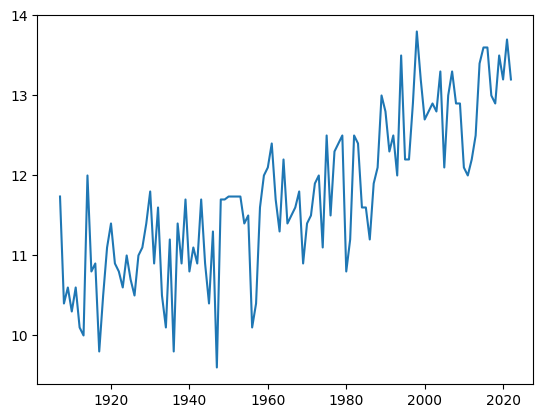

In [ ]:
import matplotlib.pyplot as plt
x = df['연도']
y = df['평균기온']
plt.plot(x,y)
plt.show()

평균기온, 최저기온, 최고기온, 라벨 표시하기

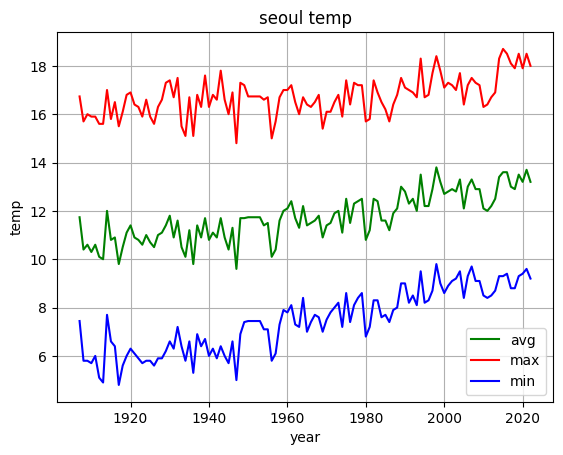

In [ ]:
import matplotlib.pyplot as plt
x = df['연도']
y = df['평균기온']
y_max = df['최고기온']
y_min = df['최저기온']
plt.plot(x,y,color = 'green', label = 'avg')
plt.plot(x,y_max, color = 'red', label = 'max')
plt.plot(x,y_min, color = 'blue', label = 'min')
plt.legend()
plt.title('seoul temp')
plt.xlabel('year')
plt.ylabel('temp')
plt.grid()
plt.show()